<a href="https://colab.research.google.com/github/Cesaraville/Wine-Classifier/blob/main/Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import keras
import tensorflow as tf

In [2]:
white = pd.read_csv('/content/winequality-white.csv', sep=';')
red = pd.read_csv('/content/winequality-red.csv', sep=';')

In [3]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Cleaning

In [5]:
red['Type of Wine'] = 'Red'
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of Wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red


In [6]:
white['Type of Wine'] = 'White'
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of Wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [7]:
df = pd.concat([red, white], axis=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of Wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [8]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# Data Manipulation

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type of Wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


## Fixed Acidity

<Axes: xlabel='fixed acidity', ylabel='quality'>

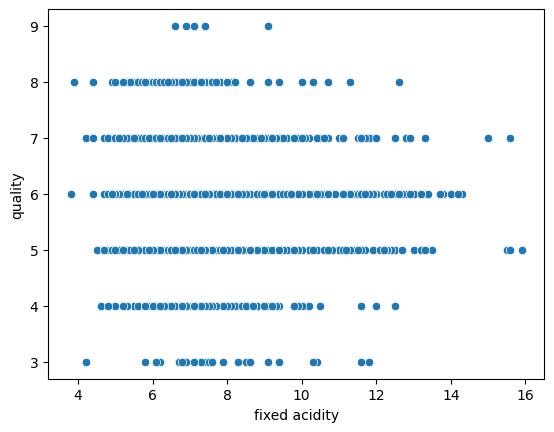

In [10]:
sns.scatterplot(x='fixed acidity', y='quality', data=df)

<Axes: xlabel='fixed acidity', ylabel='Count'>

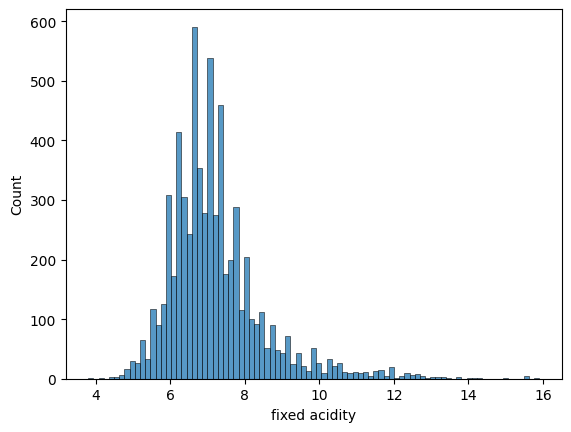

In [11]:
sns.histplot(df['fixed acidity'])

In [12]:
df['fixed acidity'].describe()

,fixed acidity
count,6497.000000
mean,7.215307
std,1.296434
min,3.800000
25%,6.400000
50%,7.000000
75%,7.700000
max,15.900000


In [13]:
df['fixed acidity'] = df['fixed acidity'].clip(upper=11)

<Axes: xlabel='fixed acidity', ylabel='Count'>

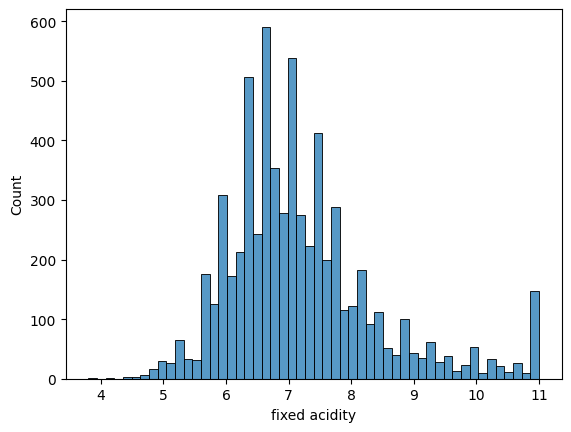

In [14]:
sns.histplot(df['fixed acidity'])

## Volatile Acidity

<Axes: xlabel='volatile acidity', ylabel='quality'>

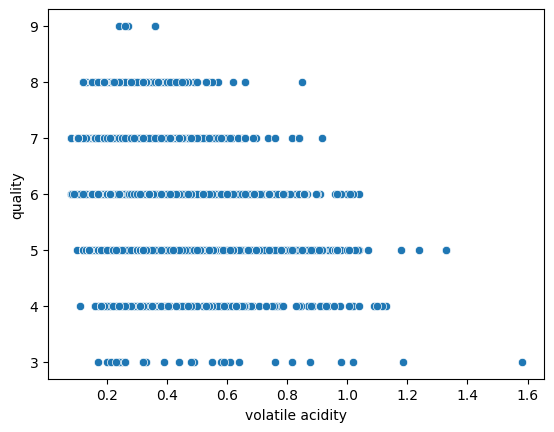

In [15]:
sns.scatterplot(x='volatile acidity', y='quality', data=df)

<Axes: xlabel='volatile acidity', ylabel='Count'>

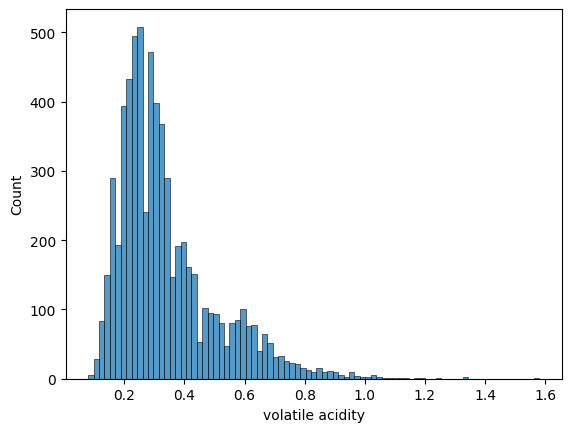

In [16]:
sns.histplot(df['volatile acidity'])

In [17]:
df['volatile acidity'].describe()

,volatile acidity
count,6497.000000
mean,0.339666
std,0.164636
min,0.080000
25%,0.230000
50%,0.290000
75%,0.400000
max,1.580000


In [18]:
df['volatile acidity'] = df['volatile acidity'].clip(upper=1.2)

<Axes: xlabel='volatile acidity', ylabel='Count'>

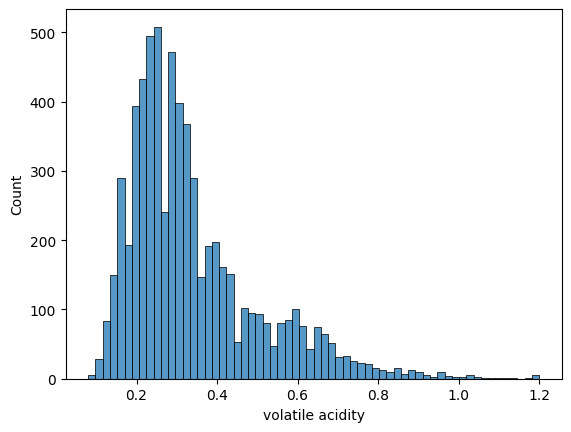

In [19]:
sns.histplot(df['volatile acidity'])

In [20]:
df['volatile acidity'] = np.log(df['volatile acidity'])

<Axes: xlabel='volatile acidity', ylabel='Count'>

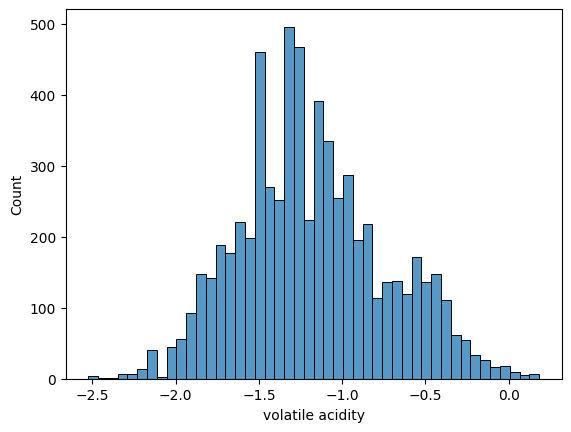

In [21]:
sns.histplot(df['volatile acidity'])

## Citric Acid

<Axes: xlabel='citric acid', ylabel='quality'>

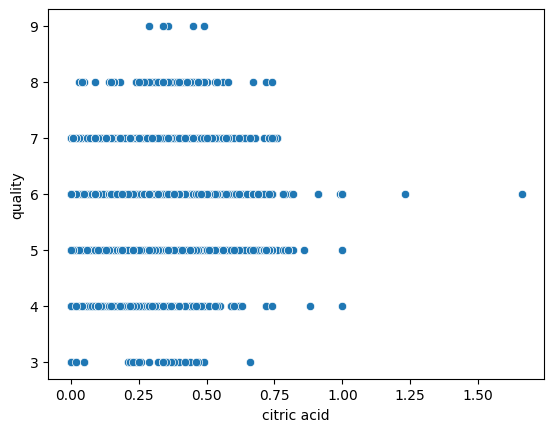

In [22]:
sns.scatterplot(x='citric acid', y='quality', data=df)

<Axes: xlabel='citric acid', ylabel='Count'>

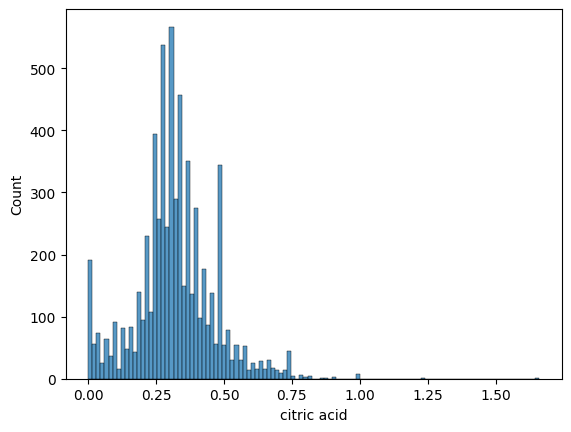

In [23]:
sns.histplot(df['citric acid'])

In [24]:
df['citric acid'].describe()

,citric acid
count,6497.000000
mean,0.318633
std,0.145318
min,0.000000
25%,0.250000
50%,0.310000
75%,0.390000
max,1.660000


In [25]:
df['citric acid'].sort_values(ascending=False)

,citric acid
745,1.66
3152,1.23
3497,1.00
151,1.00
946,1.00
...,...
249,0.00
251,0.00
3454,0.00
12,0.00


In [26]:
df.drop(745, axis=0, inplace=True)

In [27]:
df['citric acid'] = df['citric acid'].clip(upper=0.8)

<Axes: xlabel='citric acid', ylabel='Count'>

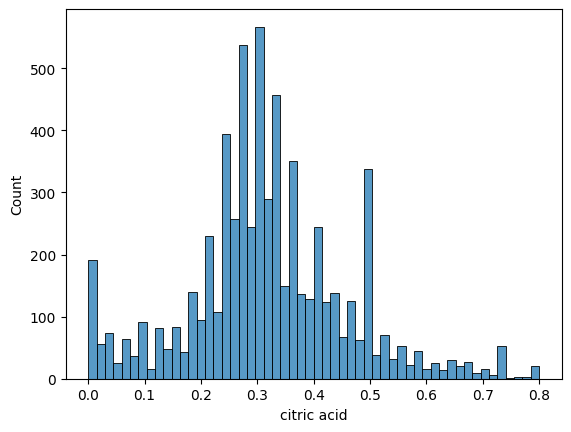

In [28]:
sns.histplot(df['citric acid'])

## Residual Sugar

<Axes: xlabel='residual sugar', ylabel='quality'>

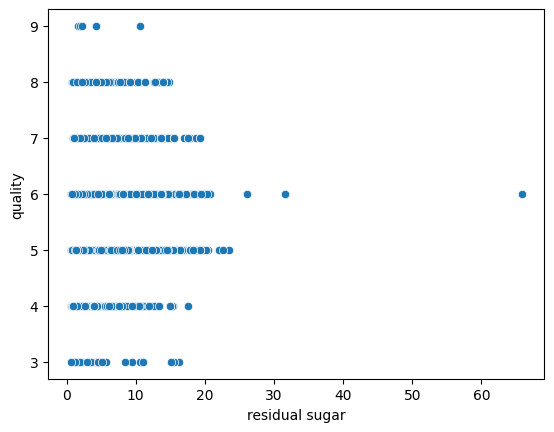

In [29]:
sns.scatterplot(x='residual sugar', y='quality', data=df)

<Axes: xlabel='residual sugar', ylabel='Count'>

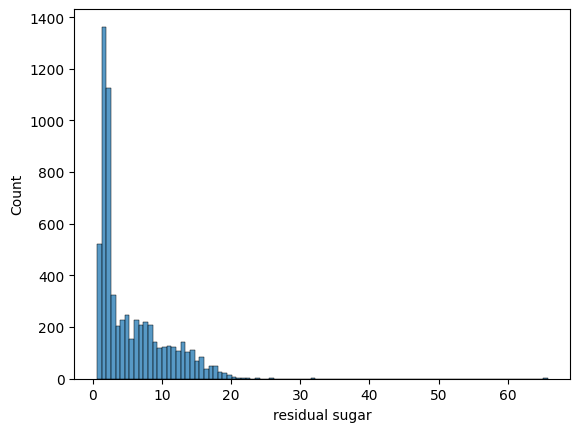

In [30]:
sns.histplot(df['residual sugar'])

In [31]:
df['residual sugar'].describe()

,residual sugar
count,6495.000000
mean,5.444265
std,4.758175
min,0.600000
25%,1.800000
50%,3.000000
75%,8.100000
max,65.800000


In [32]:
df['residual sugar'].sort_values(ascending=False)

,residual sugar
2781,65.80
1663,31.60
1653,31.60
3623,26.05
3619,26.05
...,...
2888,0.70
2934,0.70
2936,0.70
2039,0.60


In [33]:
df.drop(2781, axis=0, inplace=True)

In [34]:
df['residual sugar'] = np.log(df['residual sugar'])

<Axes: xlabel='residual sugar', ylabel='Count'>

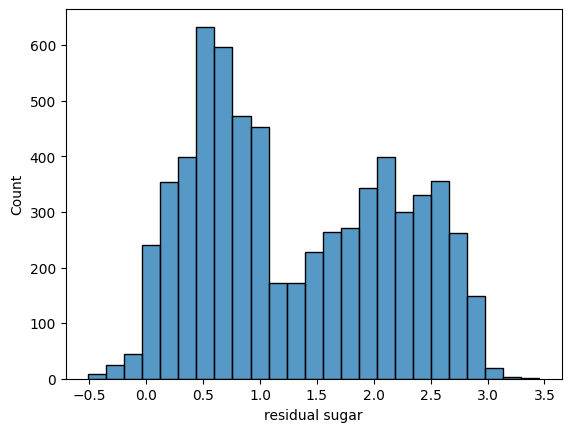

In [35]:
sns.histplot(df['residual sugar'])

## Chlorides

<Axes: xlabel='chlorides', ylabel='quality'>

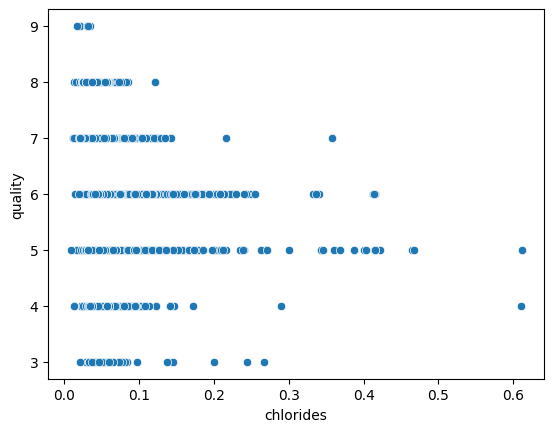

In [36]:
sns.scatterplot(x='chlorides', y='quality', data=df)

<Axes: xlabel='chlorides', ylabel='Count'>

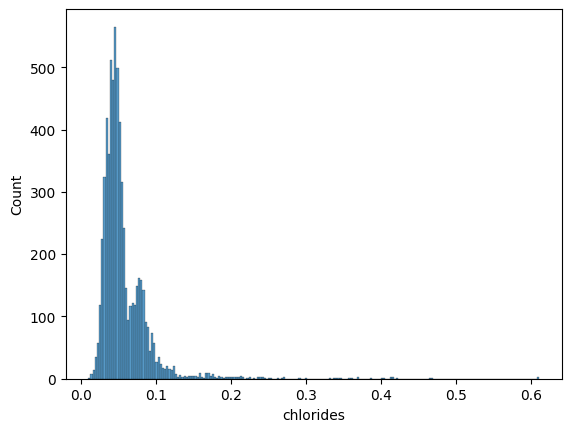

In [37]:
sns.histplot(df['chlorides'])

In [38]:
df['chlorides'].describe()

,chlorides
count,6494.000000
mean,0.056034
std,0.035038
min,0.009000
25%,0.038000
50%,0.047000
75%,0.065000
max,0.611000


In [39]:
df['chlorides'] = df['chlorides'].clip(upper=0.2)

<Axes: xlabel='chlorides', ylabel='Count'>

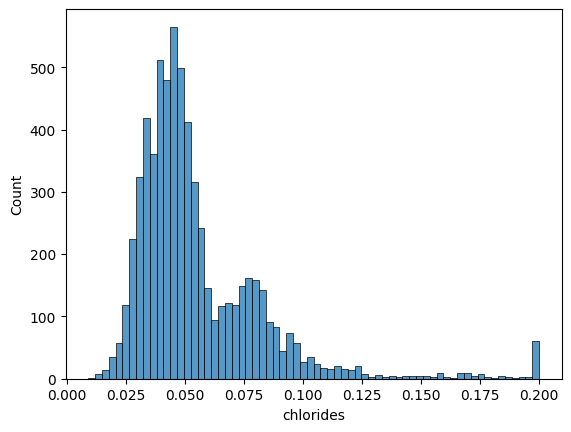

In [40]:
sns.histplot(df['chlorides'])

In [41]:
df['chlorides'] = np.log(df['chlorides'])

<Axes: xlabel='chlorides', ylabel='Count'>

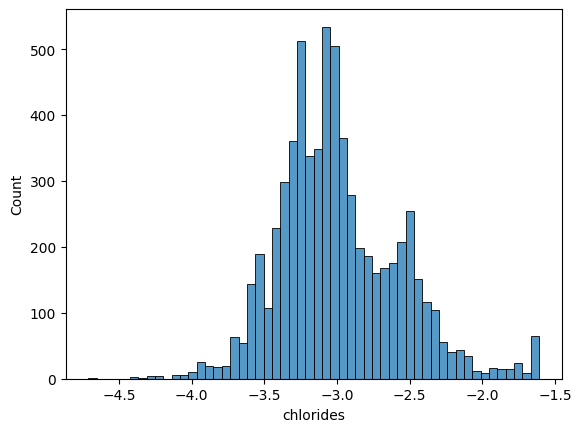

In [42]:
sns.histplot(df['chlorides'])

## Free Sulfur Dioxide

<Axes: xlabel='free sulfur dioxide', ylabel='quality'>

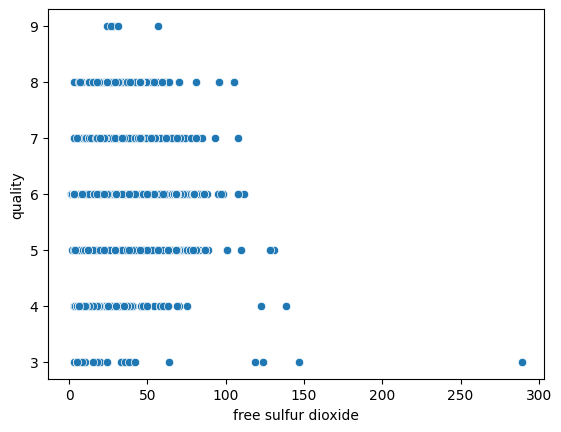

In [43]:
sns.scatterplot(x='free sulfur dioxide', y='quality', data=df)

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

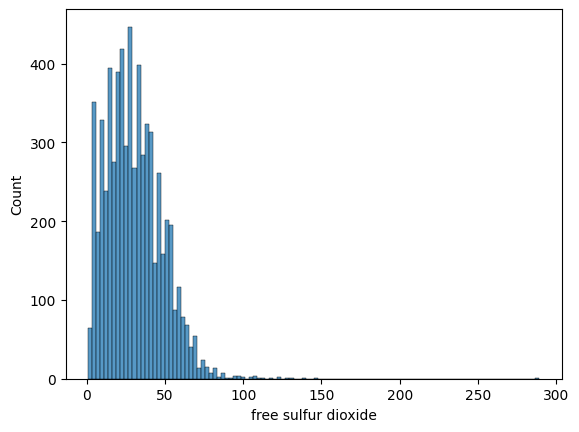

In [44]:
sns.histplot(df['free sulfur dioxide'])

In [45]:
df['free sulfur dioxide'].describe()

,free sulfur dioxide
count,6494.000000
mean,30.531106
std,17.749757
min,1.000000
25%,17.000000
50%,29.000000
75%,41.000000
max,289.000000


In [46]:
df['free sulfur dioxide'].sort_values(ascending=False)

,free sulfur dioxide
4745,289.0
1931,146.5
3050,138.5
325,131.0
2334,128.0
...,...
3668,2.0
774,2.0
535,1.0
530,1.0


In [47]:
df.drop(4745, axis=0, inplace=True)

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

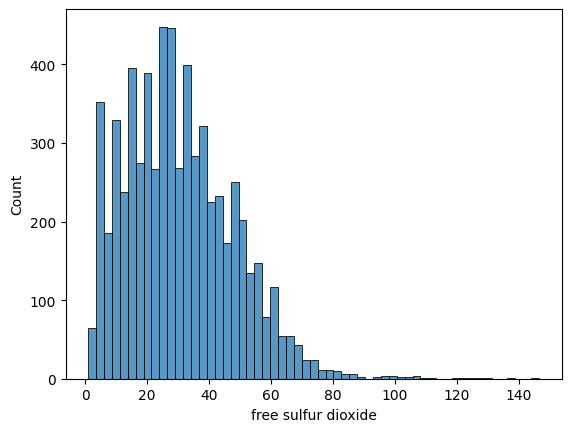

In [48]:
sns.histplot(df['free sulfur dioxide'])

In [49]:
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

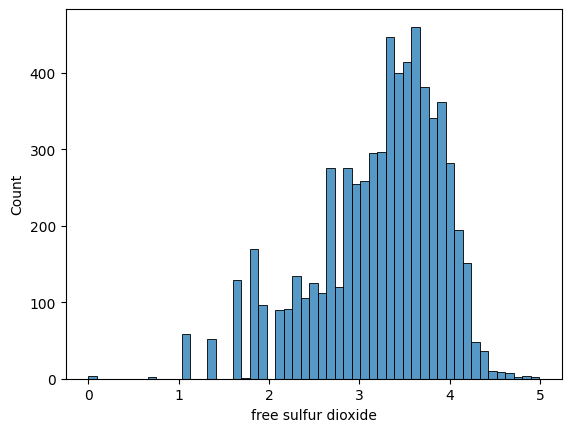

In [50]:
sns.histplot(df['free sulfur dioxide'])

## Total Sulfur Dioxide

<Axes: xlabel='total sulfur dioxide', ylabel='quality'>

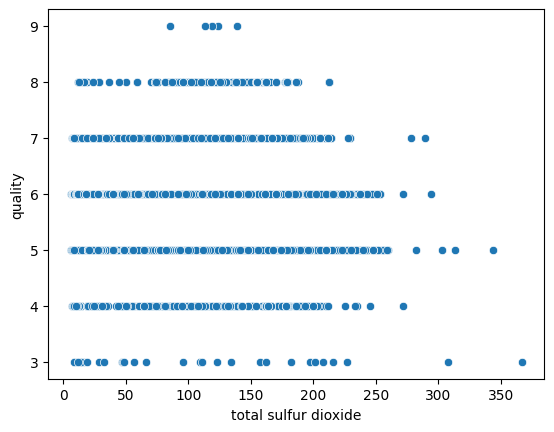

In [51]:
sns.scatterplot(x='total sulfur dioxide', y='quality', data=df)

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

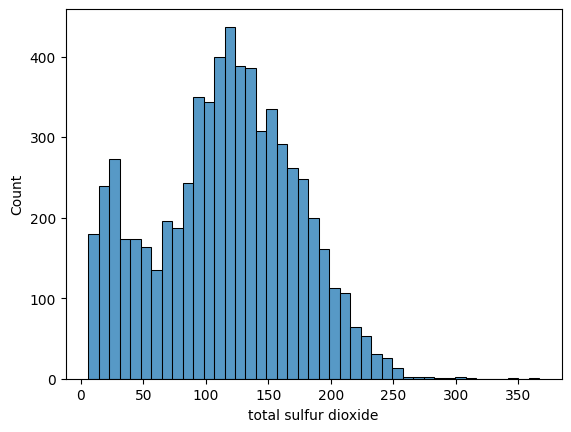

In [52]:
sns.histplot(df['total sulfur dioxide'])

In [53]:
df['total sulfur dioxide'].describe()

,total sulfur dioxide
count,6493.000000
mean,115.701756
std,56.382642
min,6.000000
25%,77.000000
50%,118.000000
75%,156.000000
max,366.500000


In [54]:
df['total sulfur dioxide'] = df['total sulfur dioxide'].clip(upper=300)

In [55]:
Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(lambda x: upper_bound if x > upper_bound else x)

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

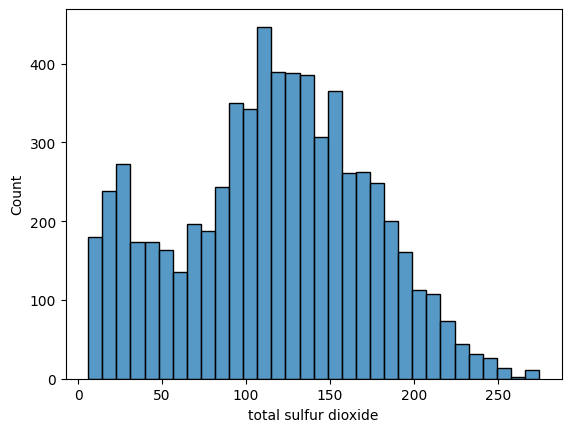

In [56]:
sns.histplot(df['total sulfur dioxide'])

## Density

<Axes: xlabel='density', ylabel='quality'>

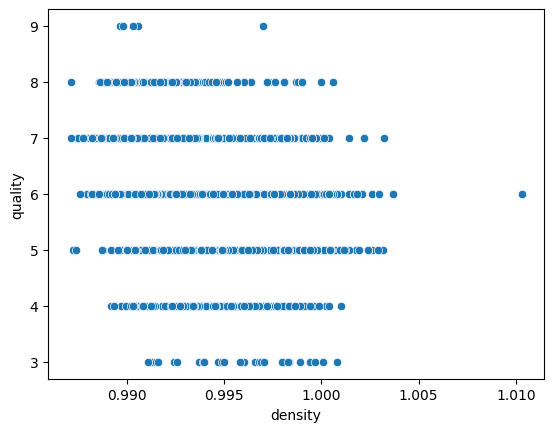

In [57]:
sns.scatterplot(x='density', y='quality', data=df)

<Axes: xlabel='density', ylabel='Count'>

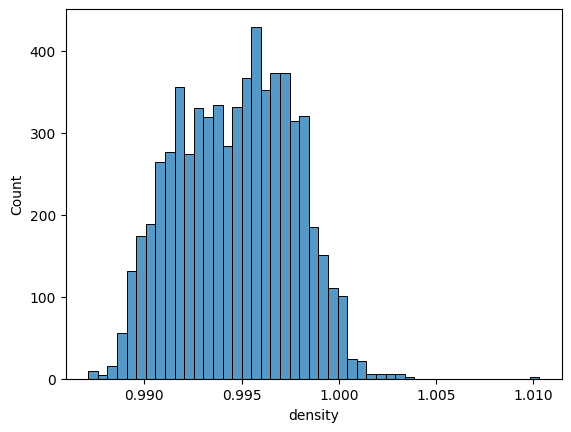

In [58]:
sns.histplot(df['density'])

In [59]:
df['density'].describe()

,density
count,6493.000000
mean,0.994690
std,0.002948
min,0.987110
25%,0.992340
50%,0.994890
75%,0.996990
max,1.010300


In [60]:
Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['density'] = df['density'].apply(lambda x: upper_bound if x > upper_bound else x)

<Axes: xlabel='density', ylabel='Count'>

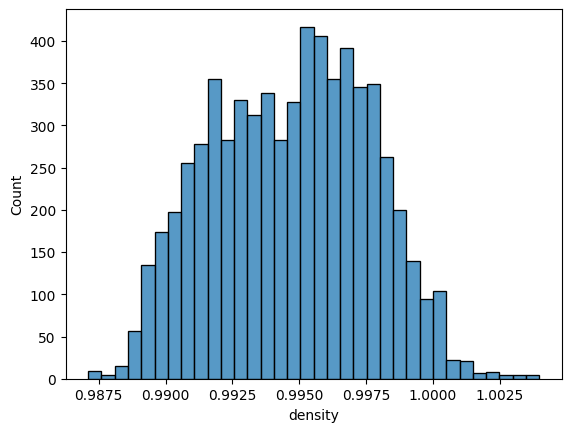

In [61]:
sns.histplot(df['density'])

## pH

<Axes: xlabel='pH', ylabel='quality'>

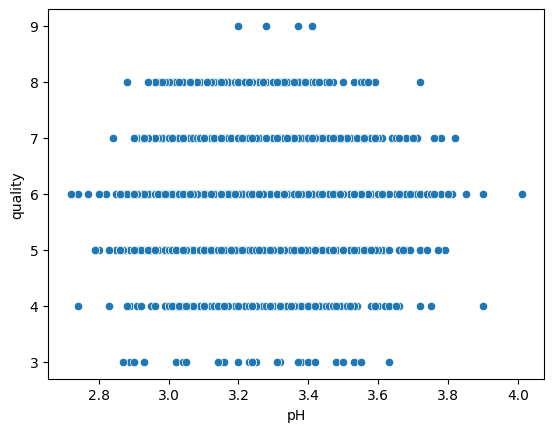

In [62]:
sns.scatterplot(x='pH', y='quality', data=df)

<Axes: xlabel='pH', ylabel='Count'>

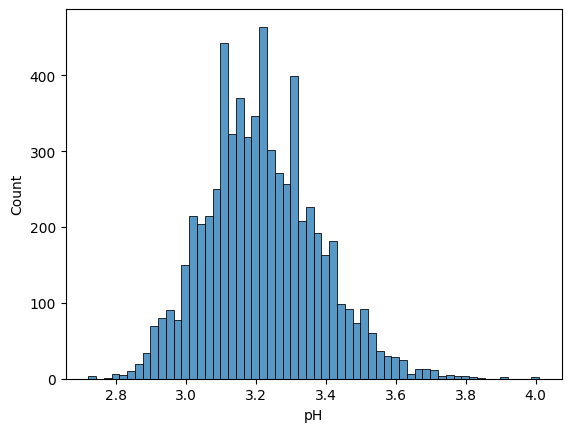

In [63]:
sns.histplot(df['pH'])

## Sulphates

<Axes: xlabel='sulphates', ylabel='quality'>

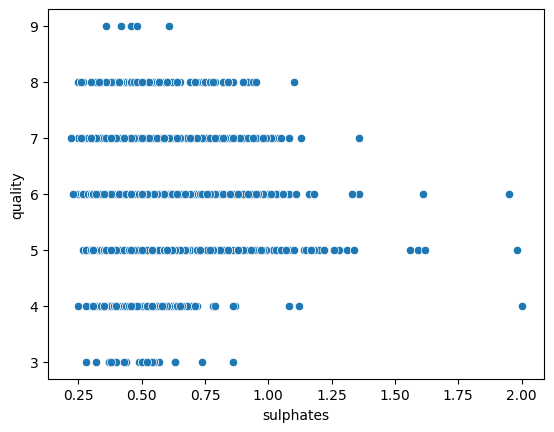

In [64]:
sns.scatterplot(x='sulphates', y='quality', data=df)

<Axes: xlabel='sulphates', ylabel='Count'>

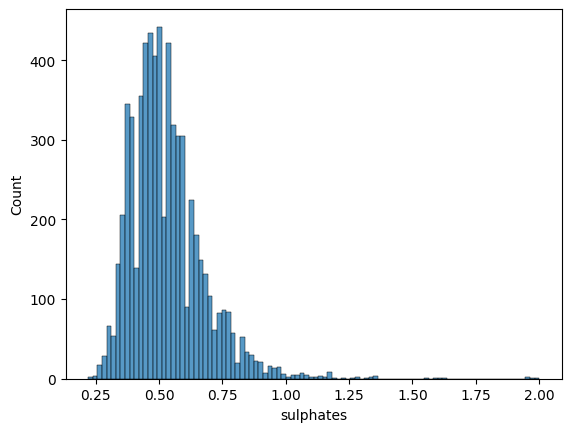

In [65]:
sns.histplot(df['sulphates'])

In [66]:
df['sulphates'].describe()

,sulphates
count,6493.000000
mean,0.531194
std,0.148812
min,0.220000
25%,0.430000
50%,0.510000
75%,0.600000
max,2.000000


In [67]:
df['sulphates'] = df['sulphates'].clip(upper=1.0)

<Axes: xlabel='sulphates', ylabel='Count'>

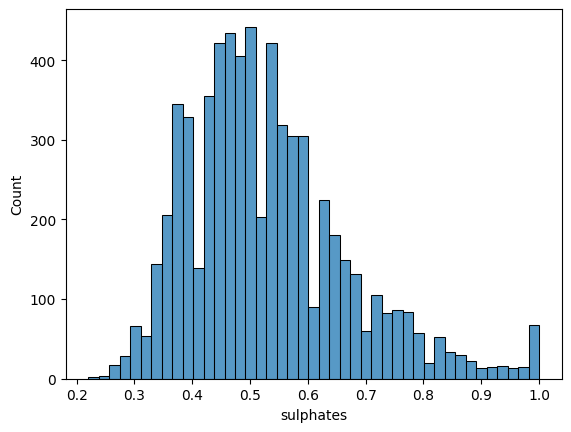

In [68]:
sns.histplot(df['sulphates'])

## Alcohol

<Axes: xlabel='alcohol', ylabel='quality'>

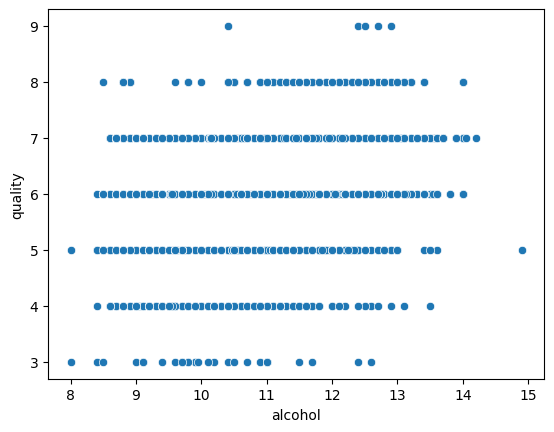

In [69]:
sns.scatterplot(x='alcohol', y='quality', data=df)

<Axes: xlabel='alcohol', ylabel='Count'>

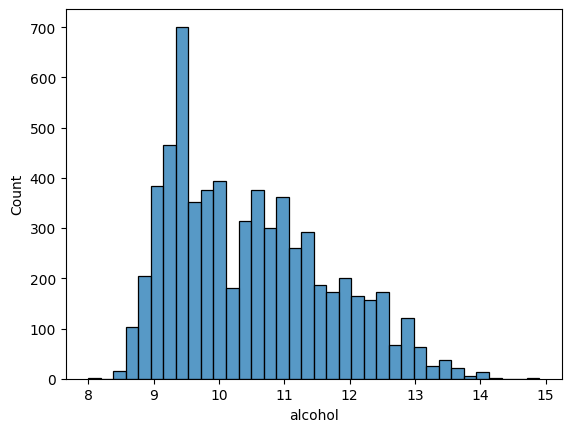

In [70]:
sns.histplot(df['alcohol'])

In [71]:
df['alcohol'].describe()

,alcohol
count,6493.000000
mean,10.491503
std,1.192733
min,8.000000
25%,9.500000
50%,10.300000
75%,11.300000
max,14.900000


In [72]:
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df['alcohol'] = df['alcohol'].apply(lambda x: upper_bound if x > upper_bound else x)

<Axes: xlabel='alcohol', ylabel='Count'>

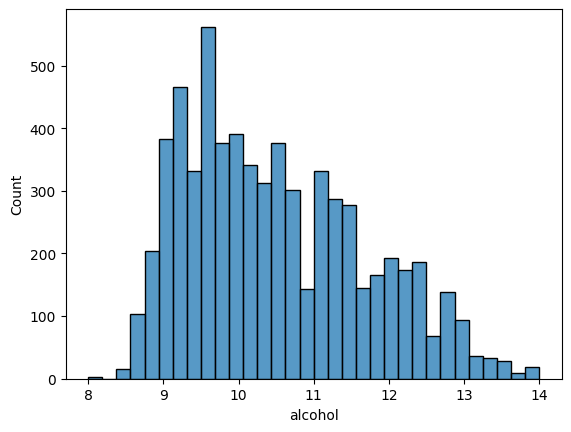

In [73]:
sns.histplot(df['alcohol'])

## Type of Wine

In [74]:
df['Type of Wine'] = pd.get_dummies(df['Type of Wine'], drop_first=True)

## Quality (Y-intercept)

<Axes: xlabel='quality', ylabel='Count'>

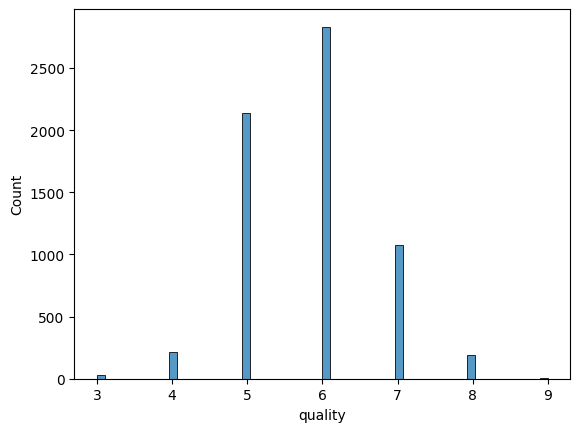

In [75]:
sns.histplot(df['quality'])

In [76]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [77]:
df['quality'] = df['quality'].replace({3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6})

# Data Splitting

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH', 'sulphates', 'alcohol']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [79]:
x_raw = df.drop(['quality'], axis=1)
y_raw = df['quality'].astype(int)

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=min(5, y_raw.value_counts().min() - 1))
x, y = smote.fit_resample(x_raw, y_raw)

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# Training Models

In [82]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [83]:
lr_model = LogisticRegression()
OvOClassifier = OneVsOneClassifier(lr_model)
OvRClassifier = OneVsRestClassifier(lr_model)

gbc_model = GradientBoostingClassifier()
OvOClassifierDT = OneVsOneClassifier(gbc_model)
OvRClassifierDT = OneVsRestClassifier(gbc_model)

svc_model = SVC()
OvOClassifierSVC = OneVsOneClassifier(svc_model)
OvRClassifierSVC = OneVsRestClassifier(svc_model)

rf_model = RandomForestClassifier()
OvOClassifierRF = OneVsOneClassifier(rf_model)
OvRClassifierRF = OneVsRestClassifier(rf_model)

knn_model = KNeighborsClassifier()
OvOClassifierKNN = OneVsOneClassifier(knn_model)
OvRClassifierKNN = OneVsRestClassifier(knn_model)

In [84]:
model = OneVsRestClassifier(LogisticRegression())
model2 = OneVsRestClassifier(GradientBoostingClassifier(loss='log_loss'))
model3 = OneVsRestClassifier(SVC(probability=True))
model4 = OneVsRestClassifier(RandomForestClassifier())
model5 = OneVsRestClassifier(KNeighborsClassifier())

## Model.fit()

In [85]:
model.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
model5.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

OneVsRestClassifier(estimator=KNeighborsClassifier())

## Results

In [86]:
y_pred = model.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)
y_pred5 = model5.predict(x_test)

In [87]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba2 = model2.predict_proba(x_test)
y_pred_proba3 = model3.predict_proba(x_test)
y_pred_proba4 = model4.predict_proba(x_test)
y_pred_proba5 = model5.predict_proba(x_test)

### Logistic Regression

In [88]:
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

accuracy  = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


print("Logistic Regression Model")
print(f"Multiclass AUC: {auc:.4f}")

print(classification_report(y_test, y_pred))

Logistic Regression Model
Multiclass AUC: 0.8467
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       291
           1       0.45      0.48      0.47       272
           2       0.41      0.48      0.45       287
           3       0.29      0.19      0.23       268
           4       0.41      0.30      0.34       281
           5       0.52      0.52      0.52       312
           6       0.74      1.00      0.85       272

    accuracy                           0.50      1983
   macro avg       0.48      0.50      0.48      1983
weighted avg       0.48      0.50      0.48      1983



### Gradient Boosting

In [89]:
auc2 = roc_auc_score(y_test, y_pred_proba2, multi_class='ovr', average='macro')

accuracy2  = accuracy_score(y_test, y_pred2)
cm2 = confusion_matrix(y_test, y_pred2)

print("Gradient Boosting Model")
print(f"Multiclass AUC: {auc2:.4f}")

print(classification_report(y_test, y_pred2))

Gradient Boosting Model
Multiclass AUC: 0.9437
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       291
           1       0.73      0.75      0.74       272
           2       0.59      0.63      0.61       287
           3       0.51      0.38      0.44       268
           4       0.62      0.58      0.60       281
           5       0.72      0.82      0.77       312
           6       0.99      1.00      0.99       272

    accuracy                           0.73      1983
   macro avg       0.72      0.73      0.72      1983
weighted avg       0.72      0.73      0.72      1983



### SVC

In [90]:
auc3 = roc_auc_score(y_test, y_pred_proba3, multi_class='ovr', average='macro')

accuracy3  = accuracy_score(y_test, y_pred3)
cm3 = confusion_matrix(y_test, y_pred3)

print("SVC Model")
print(f"Multiclass AUC for SVC: {auc3:.4f}")

print(classification_report(y_test, y_pred3))

SVC Model
Multiclass AUC for SVC: 0.7815
              precision    recall  f1-score   support

           0       0.46      0.64      0.53       291
           1       0.43      0.53      0.48       272
           2       0.38      0.26      0.31       287
           3       0.27      0.18      0.22       268
           4       0.26      0.16      0.20       281
           5       0.43      0.21      0.28       312
           6       0.50      1.00      0.67       272

    accuracy                           0.42      1983
   macro avg       0.39      0.43      0.38      1983
weighted avg       0.39      0.42      0.38      1983



### Random Forest

In [91]:
auc4 = roc_auc_score(y_test, y_pred_proba4, multi_class='ovr', average='macro')

accuracy4  = accuracy_score(y_test, y_pred4)

print("Random Forest Model")
print(f"Multiclass AUC: {auc4:.4f}")

print(classification_report(y_test, y_pred4))

Random Forest Model
Multiclass AUC: 0.9892
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       291
           1       0.92      0.98      0.95       272
           2       0.82      0.78      0.80       287
           3       0.73      0.67      0.70       268
           4       0.86      0.89      0.88       281
           5       0.95      0.97      0.96       312
           6       1.00      1.00      1.00       272

    accuracy                           0.90      1983
   macro avg       0.90      0.90      0.90      1983
weighted avg       0.90      0.90      0.90      1983



### KNeighbors Classifier

In [92]:
auc5 = roc_auc_score(y_test, y_pred_proba5, multi_class='ovr', average='macro')

accuracy5  = accuracy_score(y_test, y_pred5)

print("KNN Model")
print(f"Multiclass AUC: {auc5:.4f}")

print(classification_report(y_test, y_pred5))

KNN Model
Multiclass AUC: 0.9560
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       291
           1       0.83      0.97      0.89       272
           2       0.73      0.58      0.65       287
           3       0.57      0.33      0.42       268
           4       0.71      0.81      0.76       281
           5       0.86      0.99      0.92       312
           6       0.94      1.00      0.97       272

    accuracy                           0.81      1983
   macro avg       0.79      0.81      0.79      1983
weighted avg       0.79      0.81      0.79      1983



###Neural Network

In [93]:
model6 = keras.Sequential()

Optimizers = keras.optimizers.Adam(learning_rate=0.001)

model6.add(keras.layers.Dense(48, activation='relu', input_shape=[x_train.shape[1]]))
model6.add(keras.layers.Dense(24, activation='relu'))
model6.add(keras.layers.Dense(16, activation='relu'))
model6.add(keras.layers.Dense(7, activation='softmax'))

model6.compile(optimizer=Optimizers, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model6.fit(x_train, y_train, epochs=50, batch_size=20, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1732 - loss: 2.2471 - val_accuracy: 0.3609 - val_loss: 1.5368
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4052 - loss: 1.4573 - val_accuracy: 0.4158 - val_loss: 1.4666
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4702 - loss: 1.2736 - val_accuracy: 0.4652 - val_loss: 1.2695
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4888 - loss: 1.2177 - val_accuracy: 0.4990 - val_loss: 1.2511
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5066 - loss: 1.1715 - val_accuracy: 0.5287 - val_loss: 1.1718
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5107 - loss: 1.1596 - val_accuracy: 0.5232 - val_loss: 1.1949
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5427 - loss: 1.1286 - val_accuracy: 0.5257 - val_loss: 1.1512
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5382 - loss: 1.1137 - val_accuracy: 0.

In [95]:
y_pred6 = model6.predict(x_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [96]:
model6.evaluate(x_test, y_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 0.8689


[0.8554059267044067, 0.643469512462616]

In [99]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

num_classes = len(y_test.unique())
# Predict class probabilities
y_probs = model6.predict(x_test)  # shape: (n_samples, n_classes)

# Predict class labels
y_pred6 = y_probs.argmax(axis=1)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=range(num_classes))

# AUC score (macro average, one-vs-rest)
auc6 = roc_auc_score(y_test_bin, y_probs, multi_class='ovr', average='macro')

# Other metrics
accuracy6  = accuracy_score(y_test, y_pred6)
precision6 = precision_score(y_test, y_pred6, average='macro')
recall6    = recall_score(y_test, y_pred6, average='macro')
f1score6   = f1_score(y_test, y_pred6, average='macro')
report6    = classification_report(y_test, y_pred6)

# Output
print("Neural Network Model")
print(f"AUC Score: {auc6:.4f}")

print("\nClassification Report:\n", report6)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Neural Network Model
AUC Score: 0.9149

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.82       291
           1       0.61      0.82      0.70       272
           2       0.64      0.39      0.49       287
           3       0.39      0.25      0.31       268
           4       0.48      0.36      0.41       281
           5       0.55      0.75      0.63       312
           6       0.99      1.00      1.00       272

    accuracy                           0.64      1983
   macro avg       0.63      0.64      0.62      1983
weighted avg       0.63      0.64      0.62      1983



## Random Forest shows the best results

In [100]:
print("Random Forest Model")
print(f"Multiclass AUC: {auc4:.4f}")

print(classification_report(y_test, y_pred4))

Random Forest Model
Multiclass AUC: 0.9892
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       291
           1       0.92      0.98      0.95       272
           2       0.82      0.78      0.80       287
           3       0.73      0.67      0.70       268
           4       0.86      0.89      0.88       281
           5       0.95      0.97      0.96       312
           6       1.00      1.00      1.00       272

    accuracy                           0.90      1983
   macro avg       0.90      0.90      0.90      1983
weighted avg       0.90      0.90      0.90      1983



In [101]:
import joblib

joblib.dump(model4, 'model.pkl')

['model.pkl']